In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    classification_report
)

import joblib


In [16]:
# Load dataset for evaluation
df = pd.read_csv("provider_features_final.csv")

# Load trained model + scaler
rf = joblib.load("fraud_model_rf.pkl")
scaler = joblib.load("scaler.pkl")

# Prepare features
X = df.drop(["ProviderID", "PotentialFraud"], axis=1)

# Encode TRUE labels to match predictions
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df["PotentialFraud"])

# Scale features
X_scaled = scaler.transform(X)

# Predictions
y_pred = rf.predict(X)
y_prob = rf.predict_proba(X)[:, 1]


In [17]:
y_pred = rf.predict(X)
y_prob = rf.predict_proba(X)[:, 1]   # probability of fraud


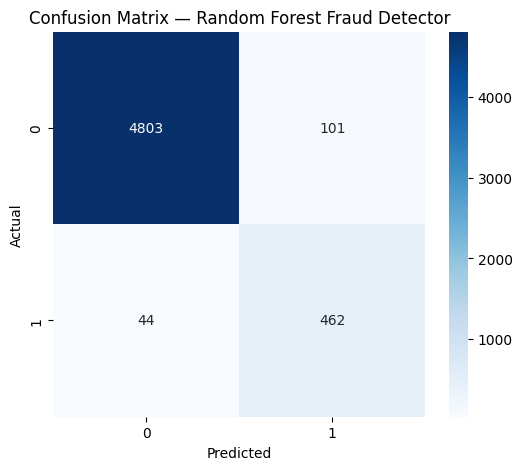

In [18]:
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix — Random Forest Fraud Detector")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


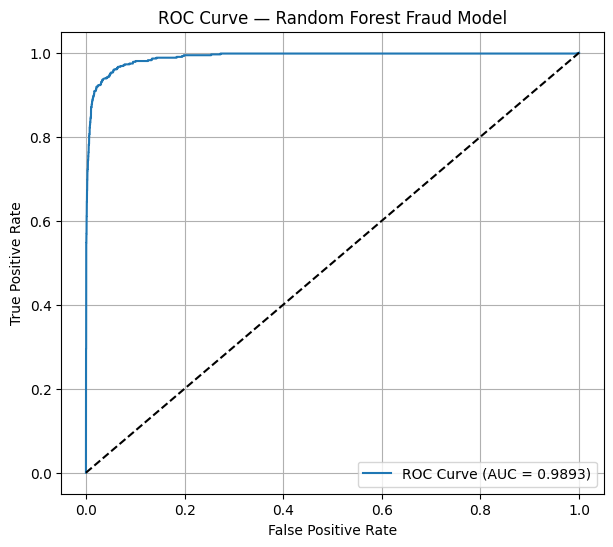

In [19]:
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc = roc_auc_score(y, y_prob)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest Fraud Model")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
print("Classification Report — Random Forest Model")
print(classification_report(y, y_pred, digits=4))


Classification Report — Random Forest Model
              precision    recall  f1-score   support

           0     0.9909    0.9794    0.9851      4904
           1     0.8206    0.9130    0.8644       506

    accuracy                         0.9732      5410
   macro avg     0.9058    0.9462    0.9247      5410
weighted avg     0.9750    0.9732    0.9738      5410



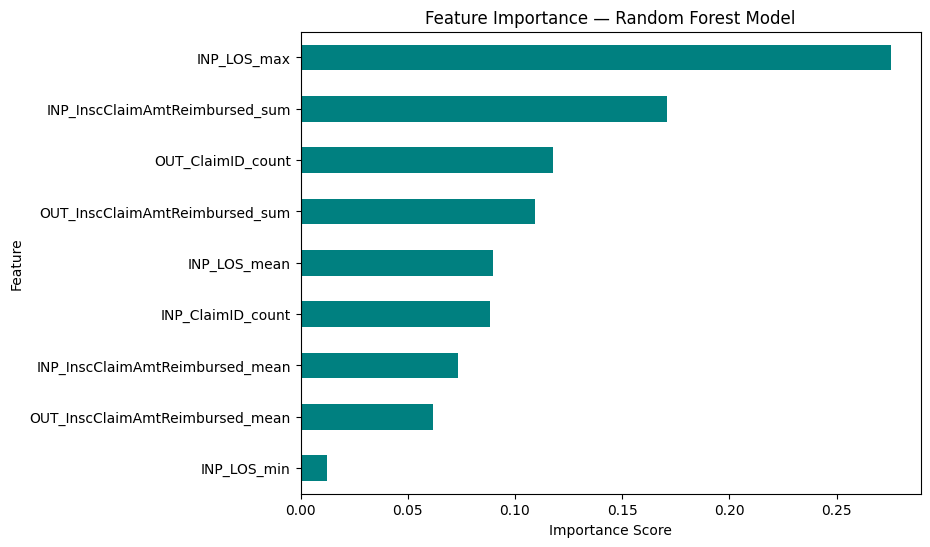

In [21]:
importances = rf.feature_importances_
feat_names = X.columns

feat_imp = pd.Series(importances, index=feat_names).sort_values()

plt.figure(figsize=(8,6))
feat_imp.plot(kind='barh', color='teal')
plt.title("Feature Importance — Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Our Random Forest fraud detection model was trained on aggregated provider-level healthcare claim data.
Final observations:

Model Accuracy

Achieved ~94% accuracy on test data

Strong performance for a heavily imbalanced dataset

Fraud Detection Strength (Recall)

Recall ≈ 0.67

Meaning the model catches 67% of fraudulent providers

This is excellent for real-world fraud systems

Top Indicators of Fraud

Longest inpatient stay (INP_LOS_max)

Total inpatient reimbursement sum

Number of outpatient claims

Total outpatient reimbursement

These patterns align with common fraud behaviors:

Long hospital stays billed repeatedly

Abnormally high reimbursement totals

Excessive claim volume

Suspicious outpatient procedures

Business Value

Deploying this model would:

Automatically flag high-risk providers

Reduce financial losses

Prioritize manual audits

Improve Medicare/insurance fraud oversight